<a href="https://colab.research.google.com/github/ur4me/Application/blob/master/Qantas_Data_Science_Exercise_NYC_Taxi_Analysis_Steve_Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparation

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00


In [ ]:
# Get packages
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import random
from sklearn.metrics import r2_score, mean_squared_error
import pmdarima as pm
from prophet import Prophet
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# Connect to Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get yellow trip data
df1 = pq.read_table('/content/drive/MyDrive/yellow_tripdata_2023-08.parquet')
df1 = df1.to_pandas()
df2 = pq.read_table('/content/drive/MyDrive/yellow_tripdata_2023-09.parquet')
df2 = df2.to_pandas()
df3 = pq.read_table('/content/drive/MyDrive/yellow_tripdata_2023-10.parquet')
df3 = df3.to_pandas()
df = pd.concat([df1,df2,df3], ignore_index=True)
del df1
del df2
del df3

# Remove duplicates
df = df.drop_duplicates()

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-08-01 00:26:44,2023-08-01 00:45:25,1.0,4.30,1.0,N,263,90,1,21.90,3.50,0.5,5.35,0.00,1.0,32.25,2.5,0.00
1,1,2023-08-01 00:55:42,2023-08-01 01:00:53,1.0,0.00,1.0,N,132,132,3,5.10,2.75,0.5,0.00,0.00,1.0,9.35,0.0,1.75
2,2,2023-08-01 00:32:04,2023-08-01 01:09:03,1.0,20.61,2.0,N,132,13,1,70.00,0.00,0.5,14.80,0.00,1.0,90.55,2.5,1.75
3,2,2023-08-01 00:13:37,2023-08-01 00:41:15,1.0,13.37,1.0,N,138,254,2,54.10,6.00,0.5,0.00,6.55,1.0,69.90,0.0,1.75
4,1,2023-08-01 00:24:46,2023-08-01 00:41:31,2.0,3.20,5.0,N,140,143,4,20.00,0.00,0.0,0.00,0.00,1.0,21.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193211,1,2023-10-31 23:44:53,2023-11-01 00:08:00,NaN,0.00,NaN,None,230,243,0,35.79,0.00,0.5,0.00,0.00,1.0,39.79,NaN,NaN
9193212,2,2023-10-31 23:38:00,2023-10-31 23:51:00,NaN,3.10,NaN,None,233,236,0,14.51,0.00,0.5,3.70,0.00,1.0,22.21,NaN,NaN
9193213,2,2023-10-31 23:56:58,2023-11-01 00:15:03,NaN,2.71,NaN,None,68,211,0,15.60,0.00,0.5,3.33,0.00,1.0,22.93,NaN,NaN
9193214,1,2023-10-31 23:37:55,2023-10-31 23:50:16,NaN,0.00,NaN,None,114,144,0,11.50,0.00,0.5,0.00,0.00,1.0,15.50,NaN,NaN


Exploratory Data Analysis & Data Cleansing

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2215cbd3f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2215cbd930>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2215cbd150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2215cbde70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2215cbe110>],
 'means': []}

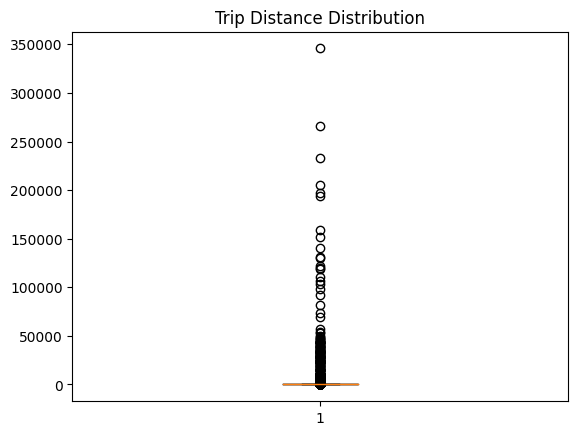

In [ ]:
# Check distribution of trip_distance
data = df['trip_distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Trip Distance Distribution')
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f221474aa40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f221474af80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f221474a7a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f221474b4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f221474b760>],
 'means': []}

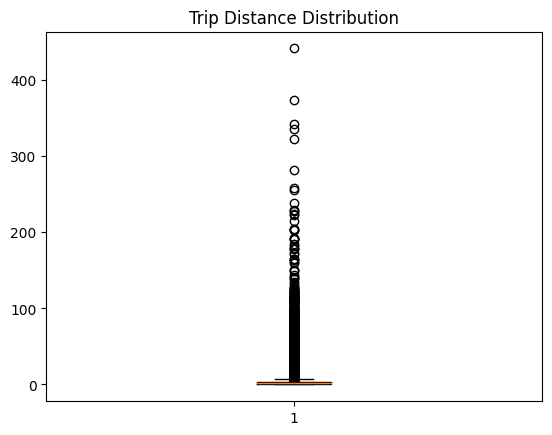

In [ ]:
# Remove outlier
# Calculate the Z-scores for the 'trip_distance' column
z_scores = np.abs(stats.zscore(df['trip_distance']))

# Define a threshold for outlier detection (e.g., z-score > 2)
threshold = 2

# Filter out rows with outliers
df_no_outliers = df[(z_scores < threshold)]
data = df_no_outliers['trip_distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Trip Distance Distribution')
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f22147d0bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22147d10f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f22147d0910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f221470cf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f221474bfd0>],
 'means': []}

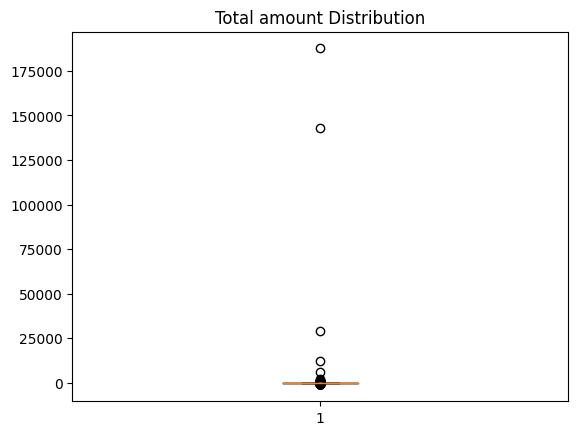

In [ ]:
# Check distribution of total_amount
data = df_no_outliers['total_amount']
fig1, ax1 = plt.subplots()
ax1.set_title('Total amount Distribution')
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f21ffed0ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f21ffed1030>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f21ffe86110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f21ffed1570>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f21ffed1810>],
 'means': []}

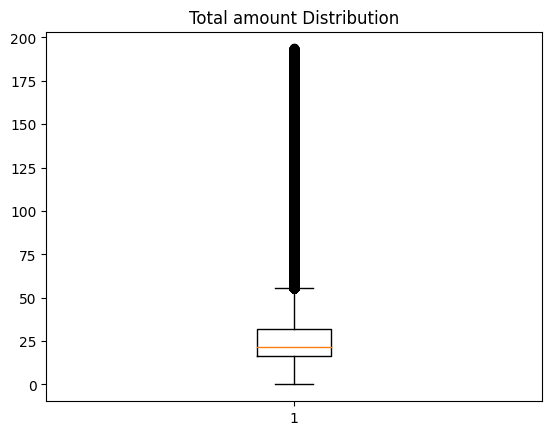

In [ ]:
# Remove outlier
# Calculate the Z-scores for the 'trip_distance' column
z_scores = np.abs(stats.zscore(df_no_outliers['total_amount']))

# Define a threshold for outlier detection (e.g., z-score > 2)
threshold = 2

# Filter out rows with outliers
df_no_outliers = df_no_outliers[(z_scores < threshold)]
df_no_outliers = df_no_outliers[(df_no_outliers['trip_distance'] > 0 ) & (df_no_outliers['total_amount'] > 0)]
data = df_no_outliers['total_amount']
fig1, ax1 = plt.subplots()
ax1.set_title('Total amount Distribution')
ax1.boxplot(data)

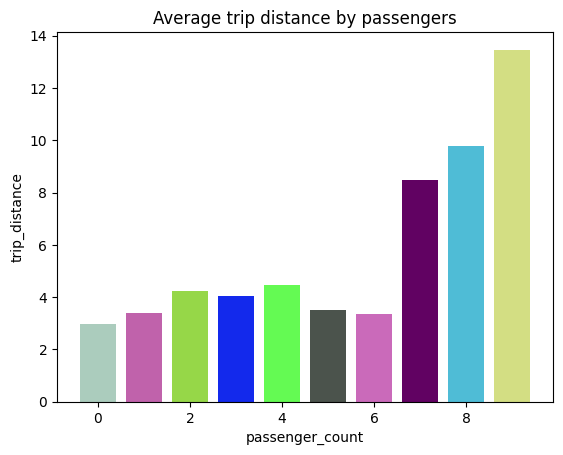

In [ ]:
# Get Average trip distance by passengers
result = df_no_outliers.groupby('passenger_count')['trip_distance'].mean().reset_index()
# Generate random colors for the bars
random_colors = ['#' + ''.join(random.choice('0123456789ABCDEF') for _ in range(6)) for _ in range(len(result))]
plt.bar(result['passenger_count'], result['trip_distance'],color=random_colors)
# Add labels and title
plt.xlabel(result.columns[0])
plt.ylabel(result.columns[1])
plt.title('Average trip distance by passengers')
# Show the plot
plt.show()

In [ ]:
# outlier treating with LOF
lof = LocalOutlierFactor(n_neighbors=2, contamination=.001)
df_no_outliers = df_no_outliers.dropna()
df_no_outliers['outlier'] = lof.fit_predict(df_no_outliers[['passenger_count',	'trip_distance','total_amount']])
df_no_outliers = df_no_outliers[df_no_outliers['outlier'] == 1]
df_no_outliers = df_no_outliers.drop(columns = 'outlier')
print(len(df_no_outliers)/len(df))

0.9339300849670018


In [ ]:
# Extracting date and hour from the datetime column
df_no_outliers['date'] = df_no_outliers['tpep_pickup_datetime'].dt.date
df_no_outliers['hour'] = df_no_outliers['tpep_pickup_datetime'].dt.hour

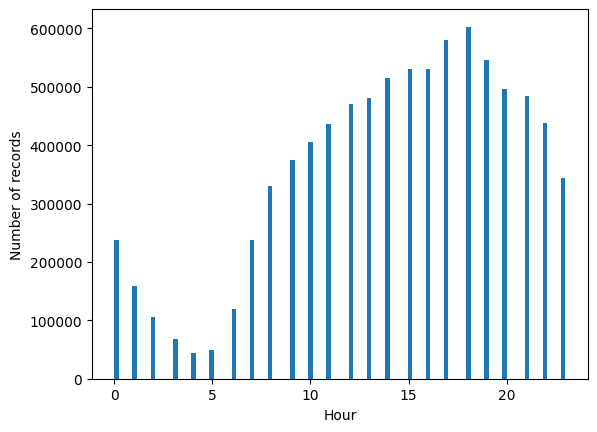

In [ ]:
# Hour distribution
plt.hist(df_no_outliers['hour'].values, bins=100)
plt.xlabel('Hour')
plt.ylabel('Number of records')
plt.show()

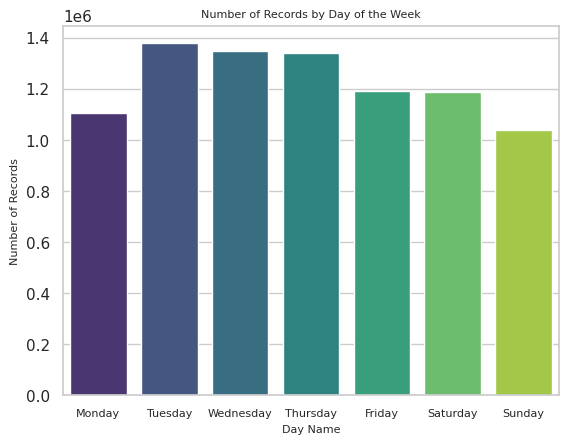

In [ ]:
# Day of week distribution
df_no_outliers['date'] = pd.to_datetime(df_no_outliers['date'])

# Get the day name
df_no_outliers['day_name'] = df_no_outliers['date'].dt.day_name()

# Specify the order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert day_name to a categorical type with the specified order
df_no_outliers['day_name'] = pd.Categorical(df_no_outliers['day_name'], categories=day_order, ordered=True)

# Use seaborn style
sns.set(style="whitegrid")

# Create a count plot with the specified order
ax = sns.countplot(x='day_name', data=df_no_outliers, palette="viridis", order=day_order)

# Set labels and title
ax.set_xlabel('Day Name', fontsize=8)
ax.set_ylabel('Number of Records', fontsize=8)
ax.set_title('Number of Records by Day of the Week', fontsize=8)

# Reduce the font size of the day names
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)

# Show the plot
plt.show()

In [ ]:
# Grouping by date and hour and counting the number of occurrences
grouped_df = df_no_outliers.groupby(['date', 'hour']).size().reset_index(name='count')
grouped_df = grouped_df.sort_values(by=['date', 'hour'])
grouped_df

,date,hour,count
0,2002-12-31,23,1
1,2008-12-31,14,1
2,2008-12-31,15,1
3,2008-12-31,20,1
4,2008-12-31,23,4
...,...,...,...
2190,2023-11-01,19,1
2191,2023-11-02,1,1
2192,2023-11-02,6,1
2193,2023-11-23,10,1


In [ ]:
# Convert the date column to datetime
grouped_df['date'] = pd.to_datetime(grouped_df['date'])

# Define your date range
start_date = '2023-08-01'
end_date = '2023-11-01'

# Filter the DataFrame
grouped_df = grouped_df[(grouped_df['date'] >= start_date) & (grouped_df['date'] < end_date)]

# Combine date and hour and change column name for modling
grouped_df['datetime'] = pd.to_datetime(grouped_df['date'].astype(str) + ' ' + grouped_df['hour'].astype(str) + ':00:00')
grouped_df.rename(columns={'datetime':'ds', 'count':'y'}, inplace=True)

# Data split for evaluation
train_df = grouped_df[grouped_df['date'] < '2023-10-21']
test_df = grouped_df[grouped_df['date'] >= '2023-10-21']

<ipython-input-17-471d6248f7be>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['datetime'] = pd.to_datetime(grouped_df['date'].astype(str) + ' ' + grouped_df['hour'].astype(str) + ':00:00')
<ipython-input-17-471d6248f7be>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df.rename(columns={'datetime':'ds', 'count':'y'}, inplace=True)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnj0uqegd/atw2nxrj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnj0uqegd/14me5rad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5636', 'data', 'file=/tmp/tmpnj0uqegd/atw2nxrj.json', 'init=/tmp/tmpnj0uqegd/14me5rad.json', 'output', 'file=/tmp/tmpnj0uqegd/prophet_modellfsmamwq/prophet_model-20240114005901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:59:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                      ds         yhat   yhat_lower   yhat_upper
2169 2023-10-31 19:00:00  7489.576776  6013.645779  9021.123519
2170 2023-10-31 20:00:00  7165.463489  5731.360921  8636.904696
2171 2023-10-31 21:00:00  6655.622754  5223.898469  8051.452381
2172 2023-10-31 22:00:00  5971.934168  4439.591047  7501.164374
2173 2023-10-31 23:00:00  5156.505158  3718.816028  6834.013838


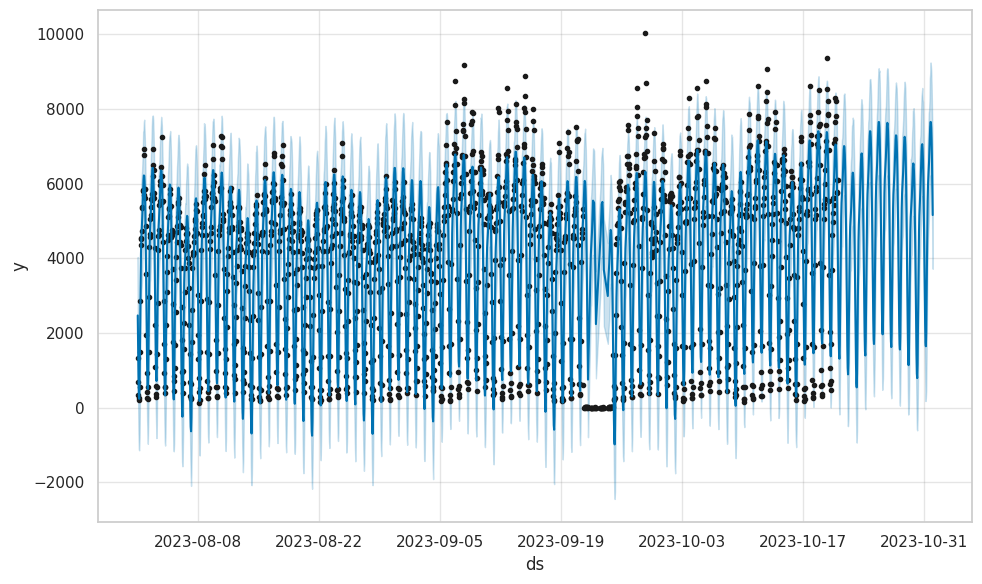

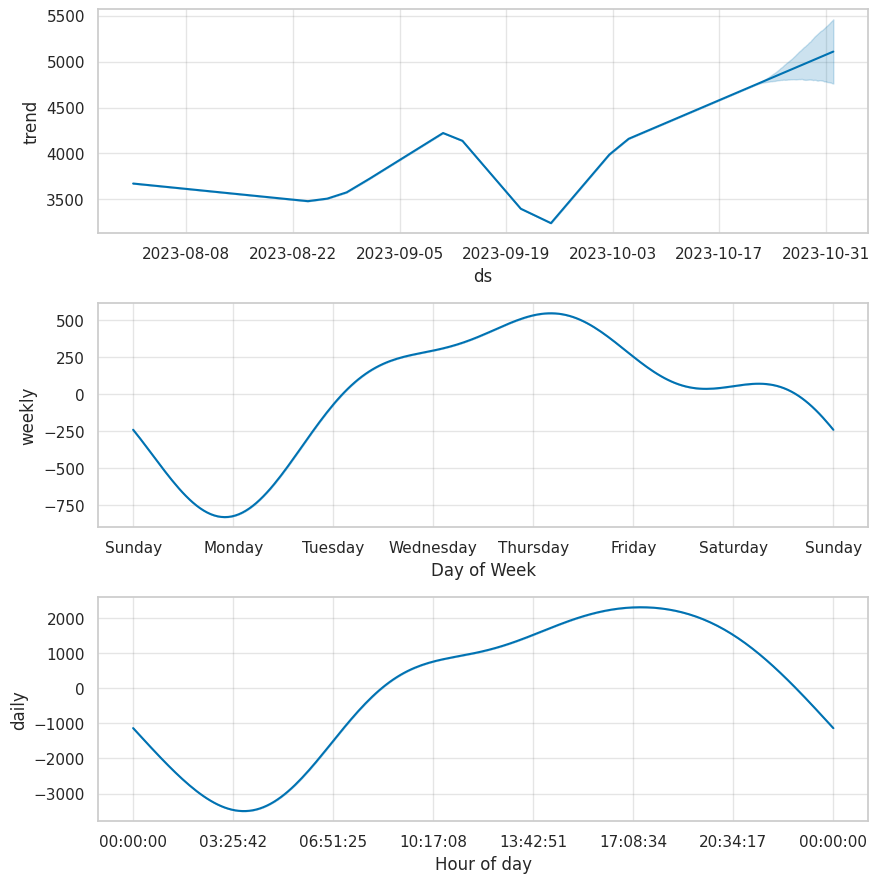

In [ ]:
# Initialize the Prophet model
model = Prophet()

# Fit the model with your dataframe
model.fit(train_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=len(test_df), freq='H')

# Forecasting
forecast = model.predict(future)

# The forecast object contains a DataFrame with the forecast
# You can view or save this DataFrame as needed
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Optional: Plotting the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


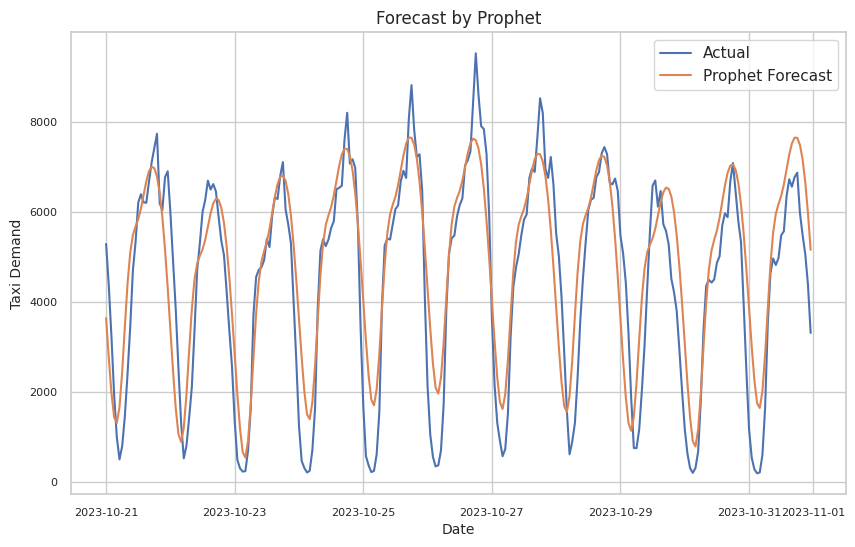

In [ ]:
# Data cleaning
prophet_df = pd.merge(test_df[['ds','y']], forecast[['ds','yhat']], how='inner', on='ds')
prophet_df.set_index('ds', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['y'], label='Actual')
plt.plot(prophet_df['yhat'], label='Prophet Forecast')

# Adding labels and title
plt.xlabel('Date', fontsize=10)
plt.ylabel('Taxi Demand', fontsize=10)
plt.title('Forecast by Prophet')

# Adjust font size of tick labels
plt.xticks(fontsize=8)  # Smaller font size for x-axis ticks
plt.yticks(fontsize=8)  # Smaller font size for y-axis ticks

plt.legend()

In [ ]:
# Evaluate Prophet model
y_true = prophet_df['y']
y_pred = prophet_df['yhat']

# Calculate R-squared
r_squared = r2_score(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

R-squared: 0.7693706699996237
RMSE: 1161.7821012757465


In [ ]:
# For demonstration, let's create a sample DataFrame
arima_train_df = train_df[train_df['date']> '2023-09-24']
arima_train_df.set_index('ds', inplace=True)  # Set datetime as index

# Fit an Auto ARIMA model
model = pm.auto_arima(arima_train_df['y'], seasonal=True,m=24, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast
forecast, conf_int = model.predict(n_periods=len(test_df), return_conf_int=True)

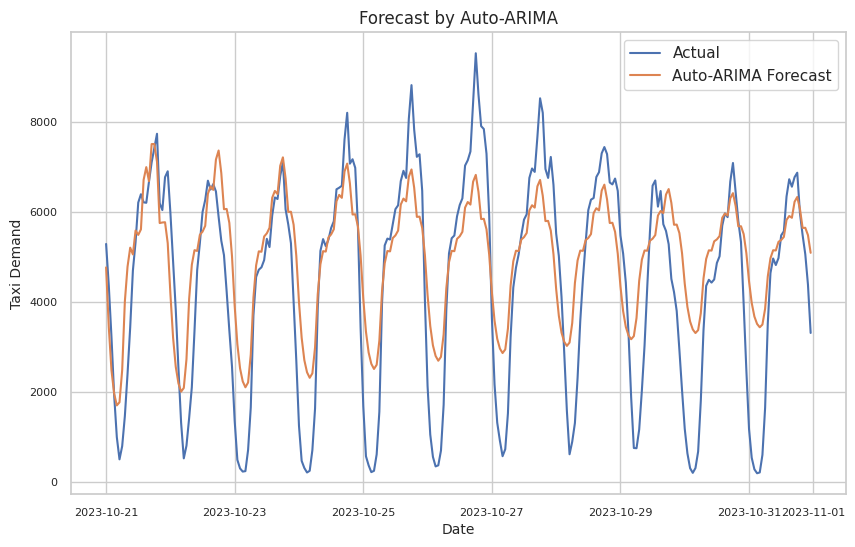

In [ ]:
# Data cleaning
arima_df = test_df.copy()
arima_df['yhat'] = list(forecast)
arima_df.set_index('ds', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(arima_df['y'], label='Actual')
plt.plot(arima_df['yhat'], label='Auto-ARIMA Forecast')

# Adding labels and title
plt.xlabel('Date', fontsize=10)
plt.ylabel('Taxi Demand', fontsize=10)
plt.title('Forecast by Auto-ARIMA')

# Adjust font size of tick labels
plt.xticks(fontsize=8)  # Smaller font size for x-axis ticks
plt.yticks(fontsize=8)  # Smaller font size for y-axis ticks

plt.legend()

In [ ]:
# Evaluate Arima model
y_true = arima_df['y']
y_pred = arima_df['yhat']

# Calculate R-squared
r_squared = r2_score(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

R-squared: 0.6115788463091438
RMSE: 1507.7135905987243


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zas_huu/j3zkq2fo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zas_huu/bxzylmel.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64816', 'data', 'file=/tmp/tmp7zas_huu/j3zkq2fo.json', 'init=/tmp/tmp7zas_huu/bxzylmel.json', 'output', 'file=/tmp/tmp7zas_huu/prophet_modelgad5r4jl/prophet_model-20240113232216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:22:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:22:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                       ds          yhat    yhat_lower    yhat_upper
12489 2025-01-03 19:00:00  12468.754748 -56716.423953  79166.278765
12490 2025-01-03 20:00:00  12131.573276 -56451.042652  78259.569282
12491 2025-01-03 21:00:00  11600.687773 -57713.040792  78166.998427
12492 2025-01-03 22:00:00  10898.513526 -57586.899622  77556.306420
12493 2025-01-03 23:00:00  10076.600074 -59318.342584  76075.487364


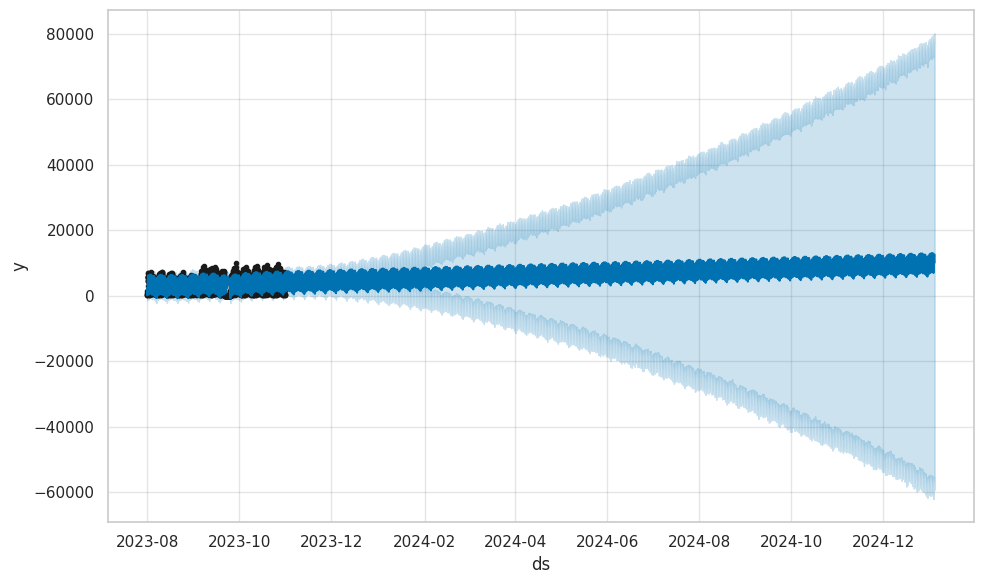

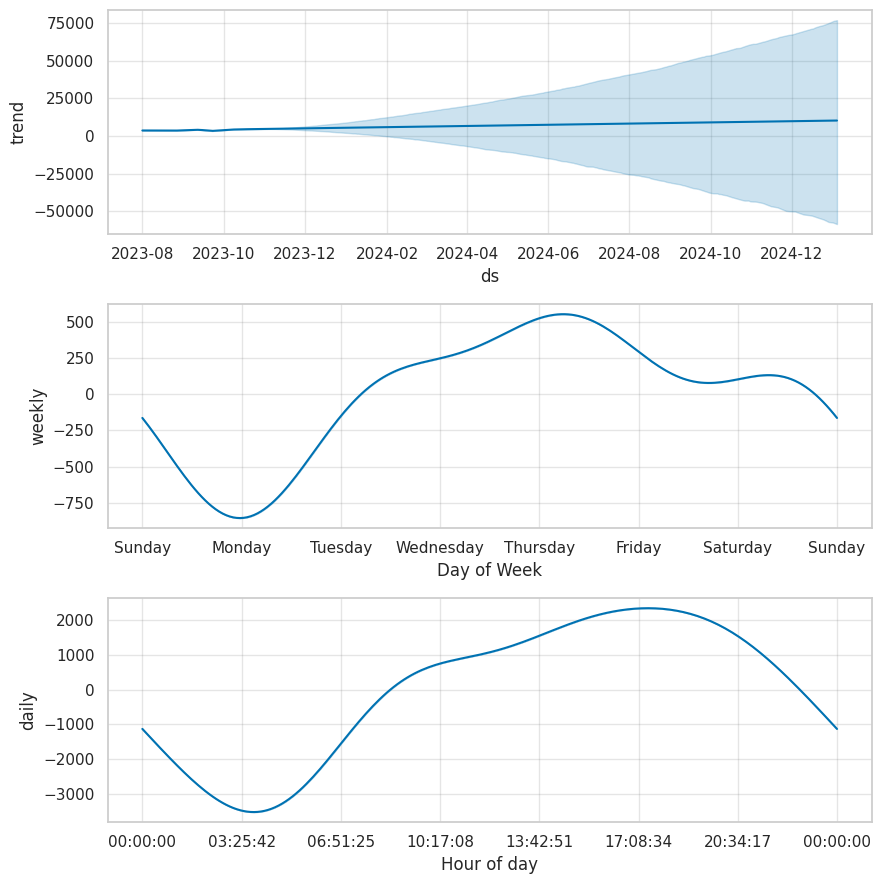

In [ ]:
# Initialize the Prophet model
model = Prophet()

# Fit the model with your dataframe
model.fit(grouped_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=24*430, freq='H')

# Forecasting
forecast = model.predict(future)

# The forecast object contains a DataFrame with the forecast
# You can view or save this DataFrame as needed
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Optional: Plotting the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


In [ ]:
# 2024 Taxi demand forecast summary
prophet_forecast = forecast[['ds','yhat']]
prophet_forecast['year'] =  prophet_forecast['ds'].dt.year
prophet_forecast = prophet_forecast[prophet_forecast['year'] == 2024]
prophet_forecast.rename(columns={'ds':'date_time', 'yhat':'forecast'}, inplace=True)
prophet_forecast

<ipython-input-43-5b48ce3b4a94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_forecast['year'] =  prophet_forecast['ds'].dt.year


,date_time,forecast,year
3638,2024-01-01 00:00:00,3457.011830,2024
3639,2024-01-01 01:00:00,2577.089540,2024
3640,2024-01-01 02:00:00,1795.893880,2024
3641,2024-01-01 03:00:00,1251.822322,2024
3642,2024-01-01 04:00:00,1103.948736,2024
...,...,...,...
12417,2024-12-31 19:00:00,12564.057598,2024
12418,2024-12-31 20:00:00,12230.874640,2024
12419,2024-12-31 21:00:00,11702.752175,2024
12420,2024-12-31 22:00:00,11002.443102,2024
